In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Read Dataset

In [2]:
df = pd.read_csv('higher_ed_employee_salaries.csv')
df.head()

,Name,School,Job Description,Department,Earnings,Year
0,Don Potter,University of Akron,Assistant Lecturer,Social Work,2472.00,2019
1,Emily Potter,The Ohio State University,Administrative Assistant 3,Arts and Sciences | Chemistry and Biochemistry...,48538.02,2022
2,Carol Jean Potter,The Ohio State University,Associate Professor-Clinical,Pediatrics,22722.80,2013
3,Kim Potter,The Ohio State University,"Manager 4, Compliance",Legal Affairs | Compliance,170143.44,2022
4,Graham Potter,Miami University,Building and Grounds Assistant,"Assoc VP Housing,Dining,Rec,Bus Svc",3075.20,2012


In [3]:
df.shape

(934348, 6)

# Data Duplicate Handling

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.shape

(801136, 6)

In [13]:
df['Earnings'].value_counts()

Earnings
50000.00     2810
40000.00     1716
3000.00      1595
35000.00     1485
2400.00      1302
             ... 
68787.94        1
133679.99       1
145434.16       1
66116.81        1
103630.58       1
Name: count, Length: 583185, dtype: int64

In [14]:
df['Name'].nunique()

267808

In [15]:
df['Job Description'].nunique()

38679

In [16]:
df['School'].nunique()

13

In [18]:
df['Department'].nunique()

9352

# Missing Value Handling

In [19]:
df.isna().sum()

Name                   0
School                 0
Job Description    22563
Department         51115
Earnings            8329
Year                   0
dtype: int64

In [22]:
df = df.dropna()

In [23]:
df.shape

(728698, 6)

In [24]:
# print(df)
df.isna().sum()

Name               0
School             0
Job Description    0
Department         0
Earnings           0
Year               0
dtype: int64

# Data Encoding

In [25]:
df.dtypes

Name                object
School              object
Job Description     object
Department          object
Earnings           float64
Year                 int64
dtype: object

- High Cardinality : Name, Job Description, Department
- Low Cardinality : School

In [26]:
X = df.drop('Earnings', axis=1)
Y = df['Earnings']

In [27]:
# Name, Job Description and Department features diencode menggunakan TargetEncoder
from category_encoders.target_encoder import TargetEncoder
enc2 = TargetEncoder(cols = ['Name', 'Job Description', 'Department']).fit(X, Y)
x_encoded2 = enc2.transform(X)
y_encoded2 = Y

In [28]:
print(x_encoded2)

                Name                          School  Job Description  \
0       47541.957747             University of Akron     13391.299714   
1       53696.103074       The Ohio State University     50079.529184   
2       51226.431984       The Ohio State University    210171.438805   
3       68140.980001       The Ohio State University     73378.384448   
4       48017.879612                Miami University     20738.351783   
...              ...                             ...              ...   
934343  49872.613133            University of Toledo     27624.777305   
934344  49872.613133            University of Toledo     30699.456389   
934345  76198.430410       The Ohio State University    166800.416347   
934346  49872.613133            University of Toledo     27624.777305   
934347  60280.136347  Bowling Green State University     60379.751583   

           Department  Year  
0        34922.774773  2019  
1        63547.438776  2022  
2        36813.811068  2013  
3  

In [29]:
x_encoded2.dtypes

Name               float64
School              object
Job Description    float64
Department         float64
Year                 int64
dtype: object

In [31]:
# School feature diencode menggunakan Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x_encoded2['School'] = le.fit_transform(x_encoded2['School'])

In [32]:
x_encoded2.dtypes

Name               float64
School               int32
Job Description    float64
Department         float64
Year                 int64
dtype: object

In [33]:
y_encoded2.dtypes

dtype('float64')

In [34]:
x_encoded2

,Name,School,Job Description,Department,Year
0,47541.957747,9,13391.299714,34922.774773,2019
1,53696.103074,7,50079.529184,63547.438776,2022
2,51226.431984,7,210171.438805,36813.811068,2013
3,68140.980001,7,73378.384448,84924.357097,2022
4,48017.879612,4,20738.351783,24131.613165,2012
...,...,...,...,...,...
934343,49872.613133,10,27624.777305,32716.523489,2021
934344,49872.613133,10,30699.456389,32322.531229,2019
934345,76198.430410,7,166800.416347,168903.857365,2018
934346,49872.613133,10,27624.777305,32716.523489,2022


In [35]:
y_encoded2

0           2472.00
1          48538.02
2          22722.80
3         170143.44
4           3075.20
            ...    
934343     31659.43
934344      7974.25
934345    243033.56
934346     37642.16
934347    103630.58
Name: Earnings, Length: 728698, dtype: float64

# Visualization

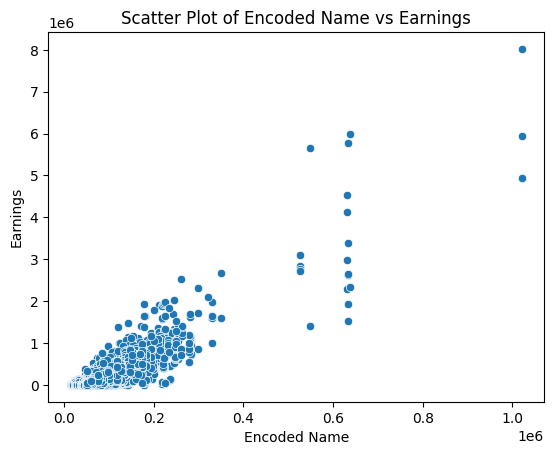

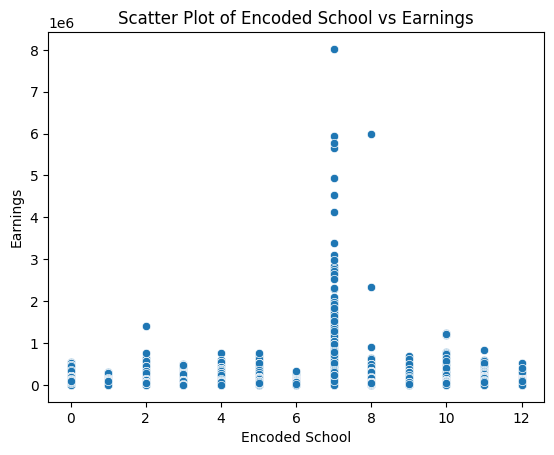

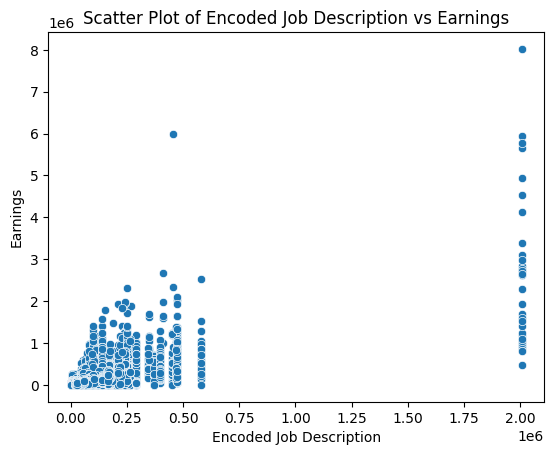

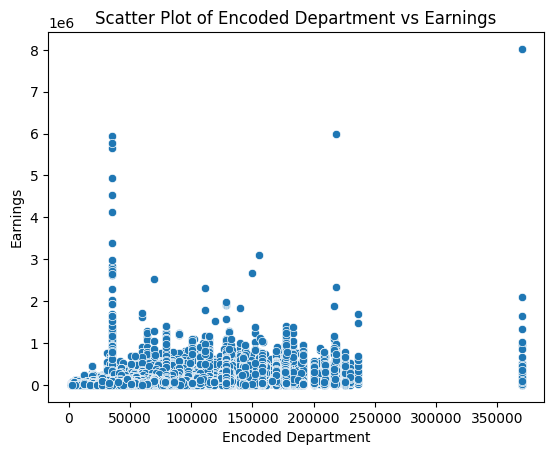

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

df_encoded = pd.concat([x_encoded2, y_encoded2], axis=1)

encoded_cols = ['Name','School', 'Job Description', 'Department']

for col in encoded_cols:
    sns.scatterplot(x=df_encoded[col], y=df_encoded['Earnings'])
    plt.title(f'Scatter Plot of Encoded {col} vs Earnings')
    plt.xlabel(f'Encoded {col}')
    plt.ylabel('Earnings')
    plt.show()

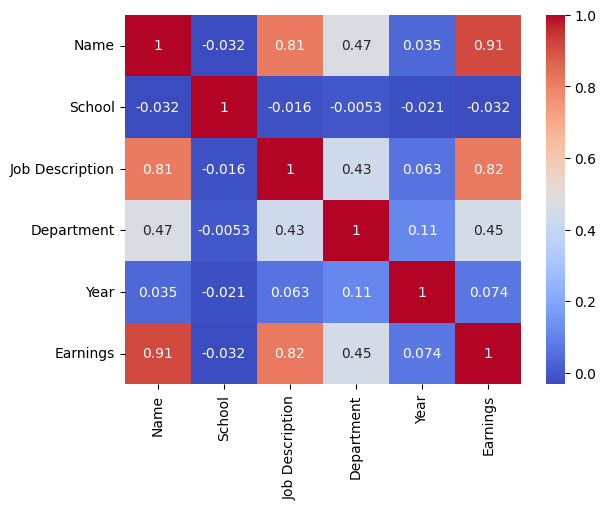

In [37]:
import seaborn as sns

sns.heatmap(df_encoded.corr(method='spearman'), annot=True, cmap="coolwarm")
plt.show()


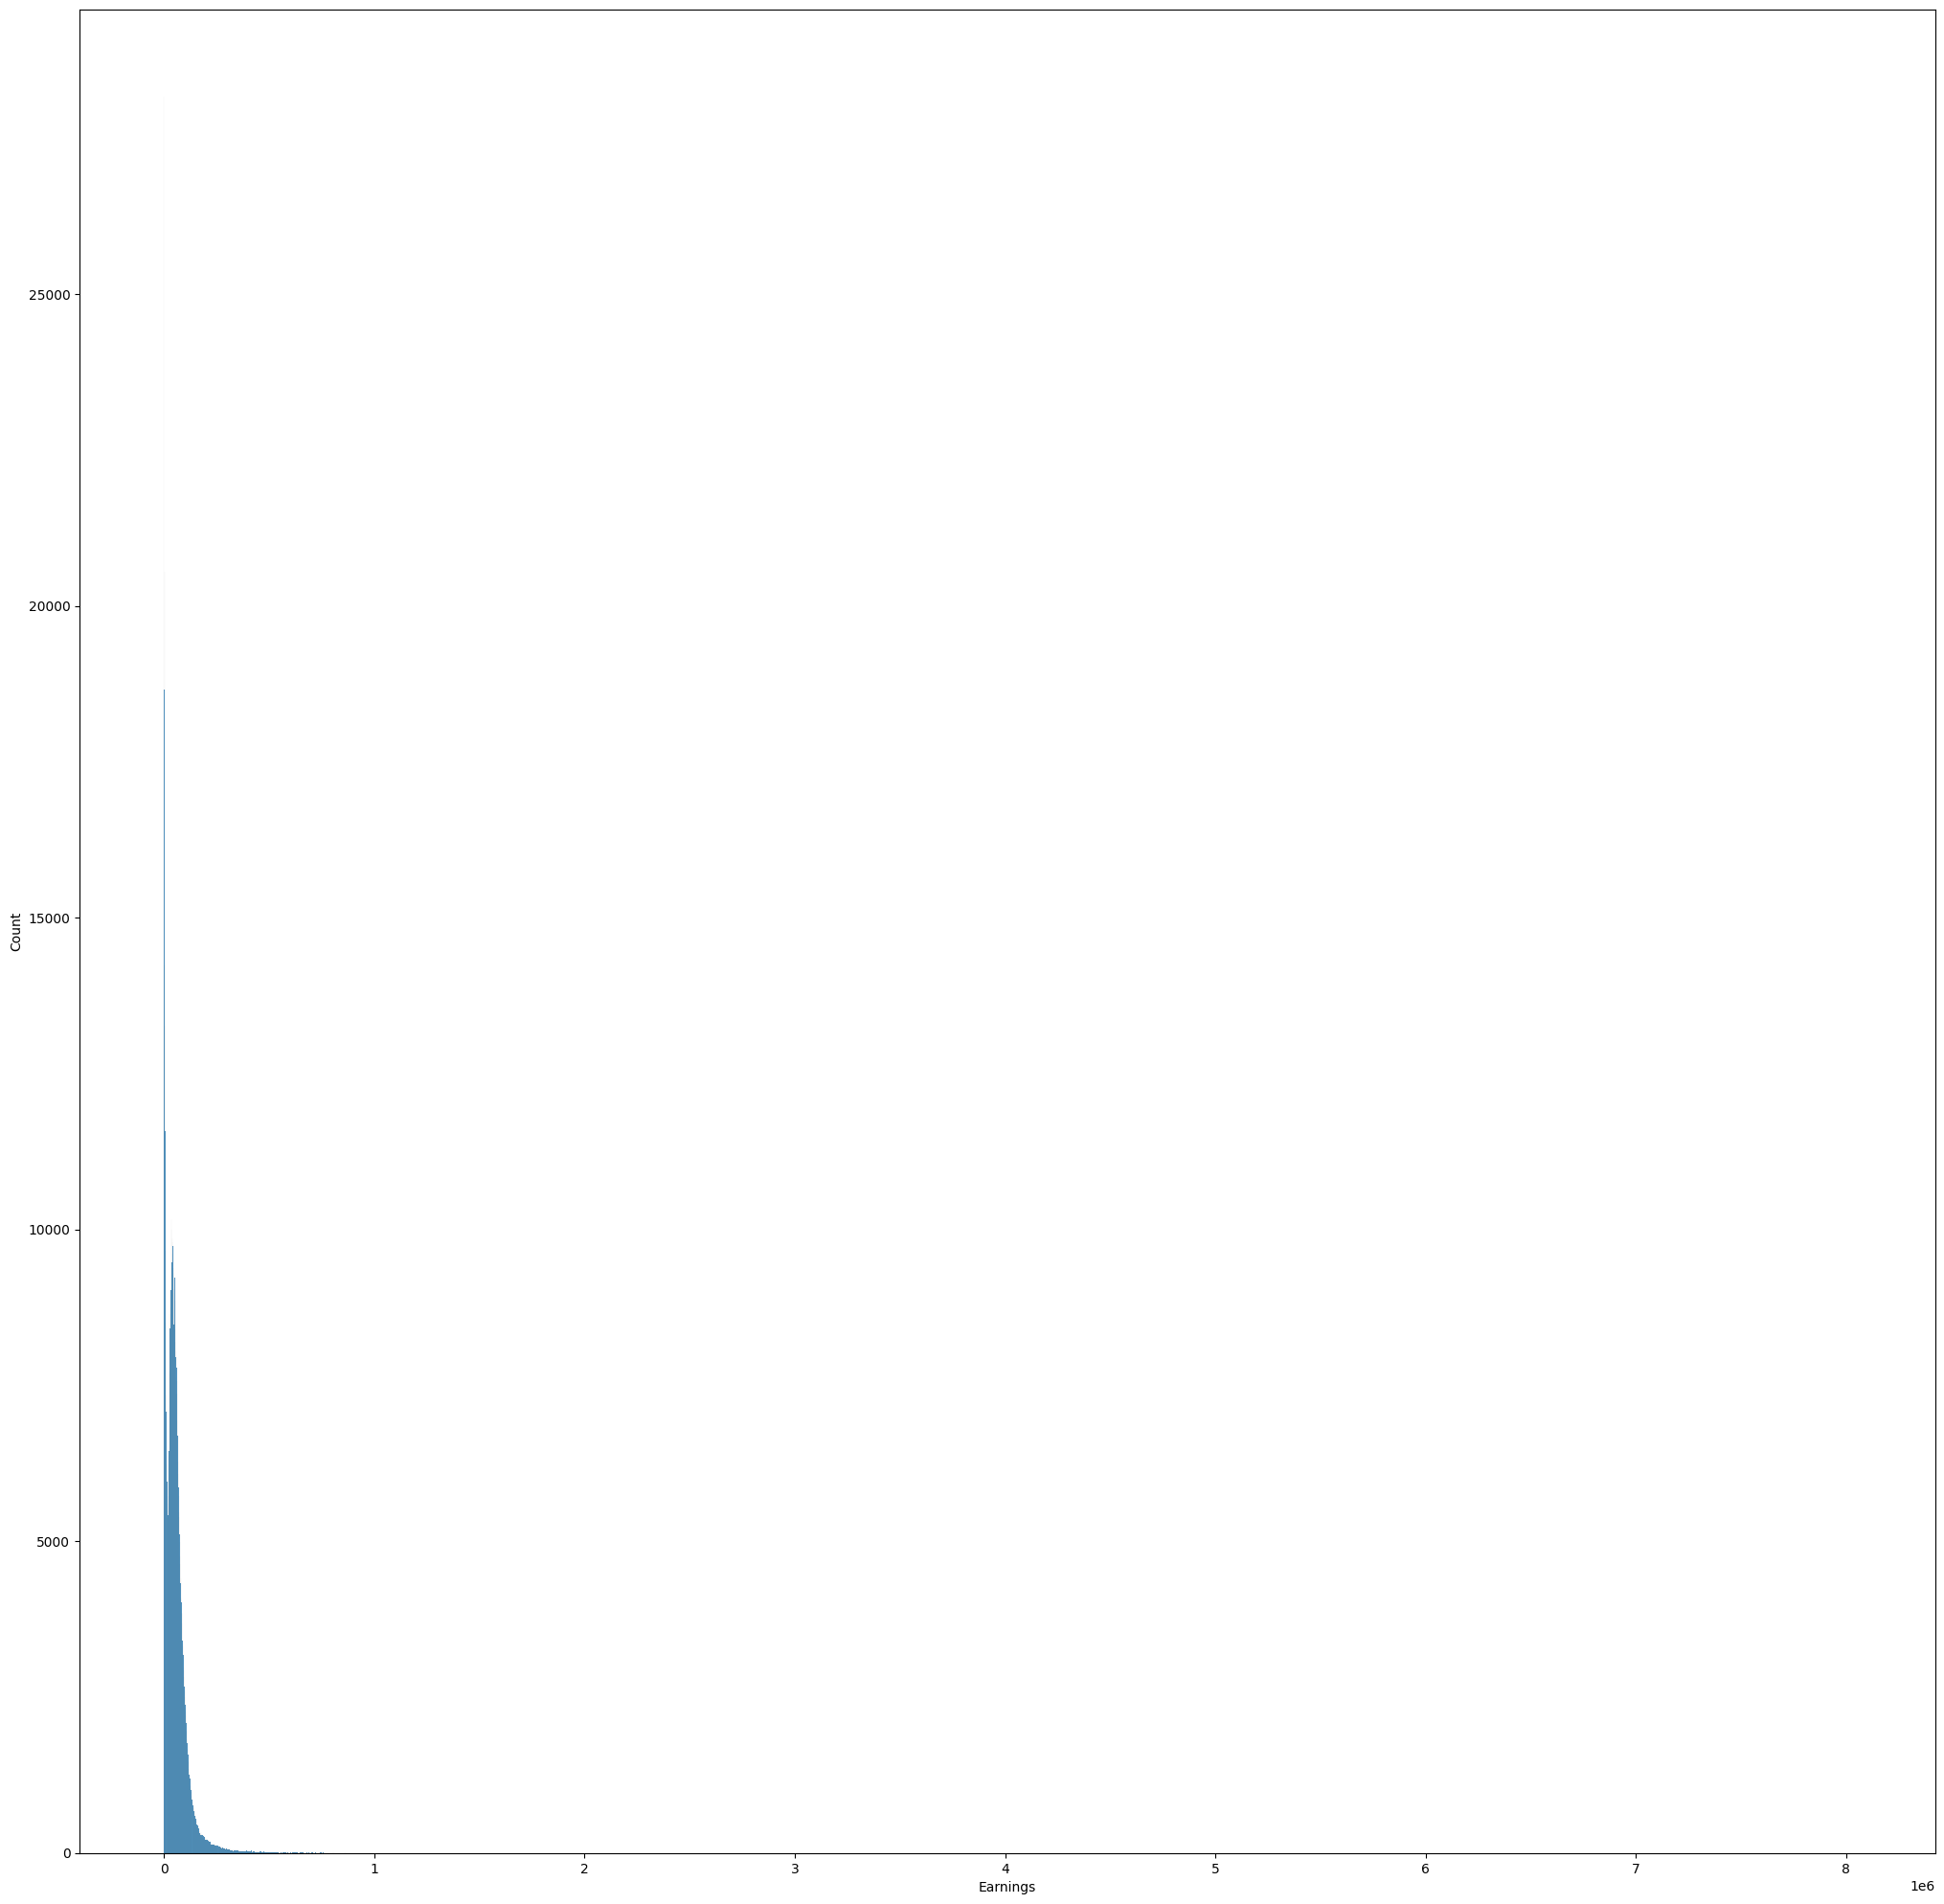

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25, 25))
sns.histplot(df_encoded['Earnings'])
plt.show()

# Separate x and y

In [42]:
x_encoded2 = df_encoded.drop('Earnings', axis=1)
y_encoded2 = df_encoded['Earnings']


# Splitting Data

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_encoded2, y_encoded2, test_size=0.1, random_state=42)

# Standarisasi

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Modelling

# CatBoost Regressor

In [51]:
from catboost import CatBoostRegressor
model = CatBoostRegressor(iterations=5000, learning_rate=0.01, depth=5, verbose=0, early_stopping_rounds=200)
model.fit(X_train, Y_train)

# Memprediksi nilai menggunakan model
predictions = model.predict(X_test)

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 9991.793679998915
Mean Squared Error: 644137524.2512288
R-squared: 0.8283942128254278


# Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression

# Membuat objek model regresi linear
model = LinearRegression()

# Melatih model menggunakan data
model.fit(X_train, Y_train)

# Memprediksi nilai menggunakan model
predictions = model.predict(X_test)

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 12328.518216318429
Mean Squared Error: 553844930.9979738
R-squared: 0.8524492180966546


# KNN

In [55]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=4)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 10281.007871071772
Mean Squared Error: 460577877.68712085
R-squared: 0.877296654394465


# Ridge Regression

In [57]:
from sklearn.linear_model import Ridge

# Define the ridge regression model with a regularization parameter alpha
alpha = 2.0  # Regularization strength; must be a positive float. Larger values specify stronger regularization.
model = Ridge(alpha=alpha)

# Fit the model on the training data
model.fit(X_train, Y_train)

# Predict on the test data
predictions = model.predict(X_test)

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 12328.524511070073
Mean Squared Error: 553844875.1450902
R-squared: 0.8524492329765175


# Polynomial Regression

In [61]:
from sklearn.preprocessing import PolynomialFeatures

# Transform the data to include polynomial features
degree = 3
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, Y_train)

# Make predictions
predictions = model.predict(X_test_poly)

In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 11567.680553240782
Mean Squared Error: 478459530.69107014
R-squared: 0.8725327724217569


# Random Forest

In [66]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=20, random_state=0)
model.fit(X_train, Y_train)

predictions = model.predict(X_test)

In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 9015.509708572556
Mean Squared Error: 407299029.1129989
R-squared: 0.8914907642003564


## DECISION TREE

In [72]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
model = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
model = model.fit(X_train, Y_train)

predictions = model.predict(X_test)

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 11399.958841333882
Mean Squared Error: 676935217.1078738
R-squared: 0.8196565229870397
